# From histograms to dashboards: An introduction to data visualization with python


<center><img src="https://i0.wp.com/digitalenvironment.org/wp-content/uploads/2020/07/visualisation_splash.png?resize=2048%2C749&ssl=1" width="1000" /></center>

<center><h3>By Jose Sergio Hleap, PhD</h3></center>

## About this Document

### What is NOT about
1. In depth tutorial of visualization: Here we will see multiple different SIMPLE ways to visualize data
2. Programming crash course: it assumes you know some python basics
3. Comprehensive list of visualization techniques: That would be a full 4 credit course

#### What IS about
1. Rapid visualization of simple data
2. Identify where/how to look for information
3. Show you the world beyond ggplot
4. Introduce you to dashboards to explore your data

## The dataset

<center><img src="iris.png" class="center" style="width: 1200px;"/></center>

Dataset generated by Ronald Fisher in 1936. Comprised of 150 samples, 50 samples of 3 different species of Iris plant (Iris Setosa, Iris Versicolour and Iris Virginica). For each sample, the flower measurements are recorded for the sepal length, sepal width, petal length and petal width. In this notebook (and during the associated webinar), we will be using the dataset that ships with scikit learn.

### Loading the iris dataset

The first step in any data pipeline is data ingestion. This can happened either by quering a database, reading a file, pulling data from the internet, or loading it from prepackaged modules. In here we will do the latter:

In [1]:
# Load the function load_iris from sklearn
from sklearn.datasets import load_iris
# Import the pandas library to read and process the data
import pandas as pd
# Load the data 
data = load_iris()
# Read it into a dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
#Adding clusters
names = dict(zip([0,1,2], data.target_names))
df['Species'] = [names[i] for i in data.target]
# Displaying the first few rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Pandas also has the functionality to describe your dataset:

In [2]:
df. describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Exploratory visualization

We just interacted numerically with our data. We have our table, and we have modify it slightly. However, the best way to understand our data is to visualize it. There are many different figures that can be employed to do this, from a histogram to a pie diagram (avoid the pies though!). One of the most basic plots toe xplore your data is a distribution plot known as a histogram. Pandas has a built-in method `hist` that will produce a histogram per each numerical column:

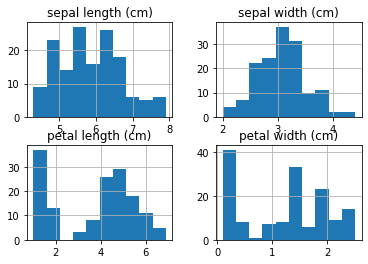

In [3]:
axes = df.hist()

Let's say we want all these plots in a single figure. Pandas also provides the method `plot` that with the option `kind`, can do exactly that:

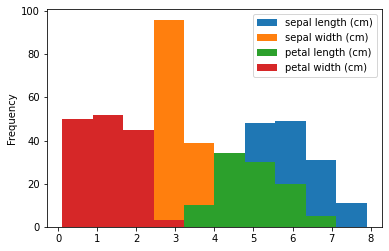

In [4]:
ax = df.plot(kind='hist')

That can be a little bit clutter, so we might want just the distributions, density plot style. For that we can also use the `plot` method of pandas' dataframe:

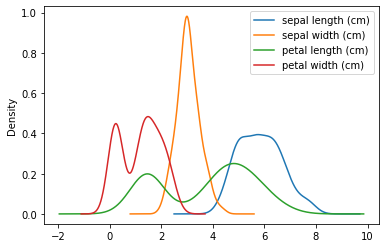

In [5]:
ax = df.plot(kind='kde')

Another very popular type of plot to explore data's distribution is the box-plot. This one can be done out of the box by:

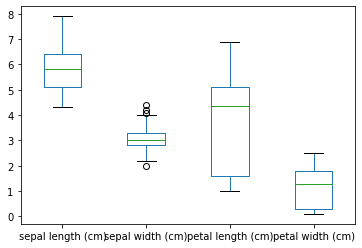

In [6]:
ax = df.plot(kind='box')

Or we can plot the area of each of these numeric variables:

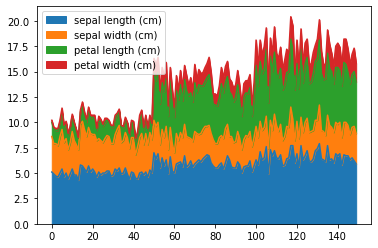

In [7]:
ax = df.plot(kind='area')

Although not very useful for our purposes, often data comes with different number of overalpping points. Those overlapping points create a differential in the point density that can be explored with hexbin plots. For these kind of plots (as with scatter plots) we need to provide the two dimensions we want to plot:

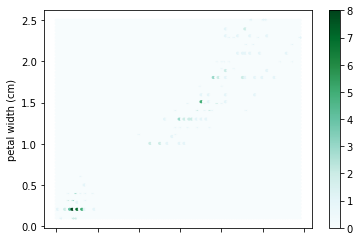

In [8]:
ax = df.plot(x='petal length (cm)', y='petal width (cm)', kind='hexbin')

Other kinds of plotting involve the counts over a particular grouping. Say we want to show how many individuals per species we have, and display it using a barplot. For that we'll use the `groupby` function of pandas dataframes, along (or before) with the `plot` one:

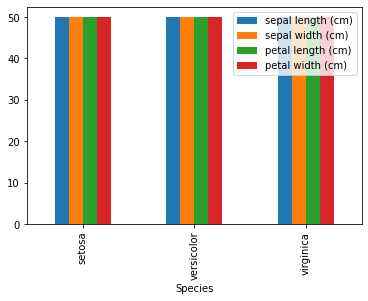

In [9]:
counts= df.groupby('Species').count()
ax = counts.plot(kind='bar')

Not very informative is it? that is because we have a very balanced dataset with 50 individuals per species. Now, just for ilustrative purposes, we can also transform that plot into horizontal bars:

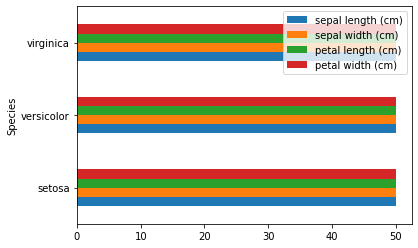

In [10]:
ax = counts.plot(kind='barh')

Or a set of pie charts:

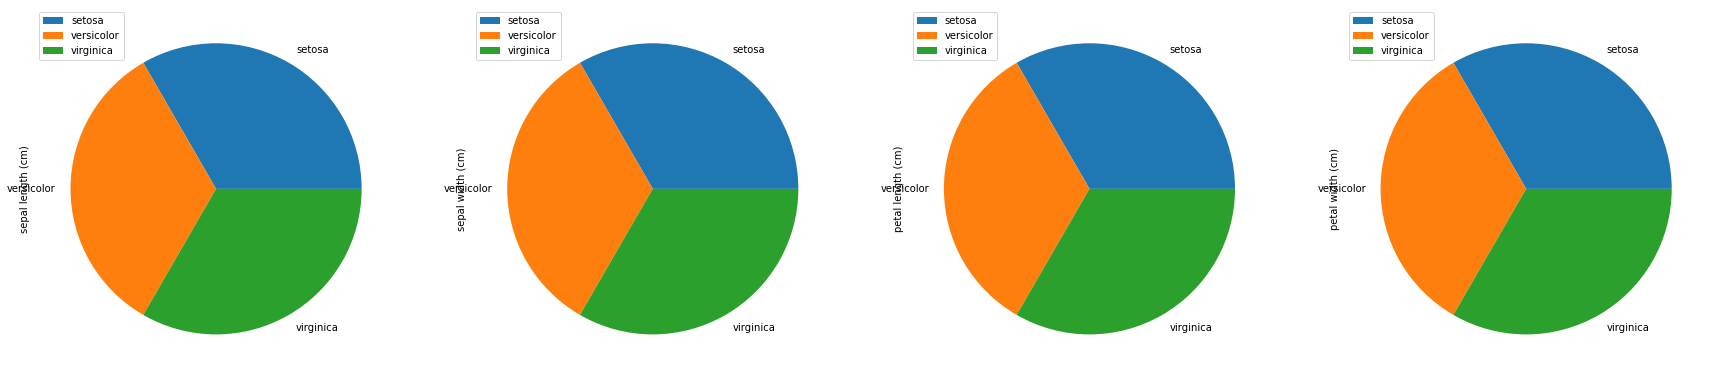

In [11]:
axes = counts.plot(kind='pie', subplots=True, figsize=(30,30))

As we seen we have multiple ways to visually explore our data. The previous section is by no means exaustive, but is to get you started with the exploratory visualization.

## Plotting by groups

As evidenced by the last few plots, exploring the data by groups or any given categorical value is very important in data-driven research. Fortunatelly, pandas makes it very simple with its `groupby` function. For example, let's try to plot the densities of the features per species:

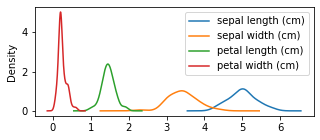

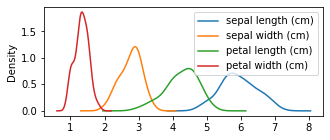

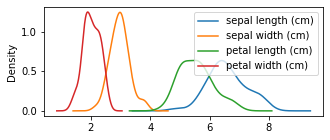

In [12]:
axes = df.groupby('Species').plot(kind='kde', figsize=(5,2))

On a first look is impossible to know which species is which. But we can actually stack them and add titles:

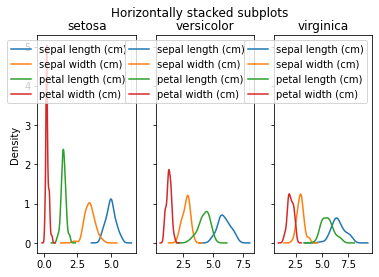

In [13]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=3,  sharex=False, sharey=True)
fig.suptitle('Horizontally stacked subplots')
for ax, (name, grp) in zip(axes, df.groupby('Species')):
    grp.plot(kind='kde', ax=ax, title=name)

We can note many things:
1. we can arrange subplots how we want them with nrows and ncols.
2. We can make the plots share x or y axis
3. The legends are repeated and give no aditional info

Let's fix the last issue:

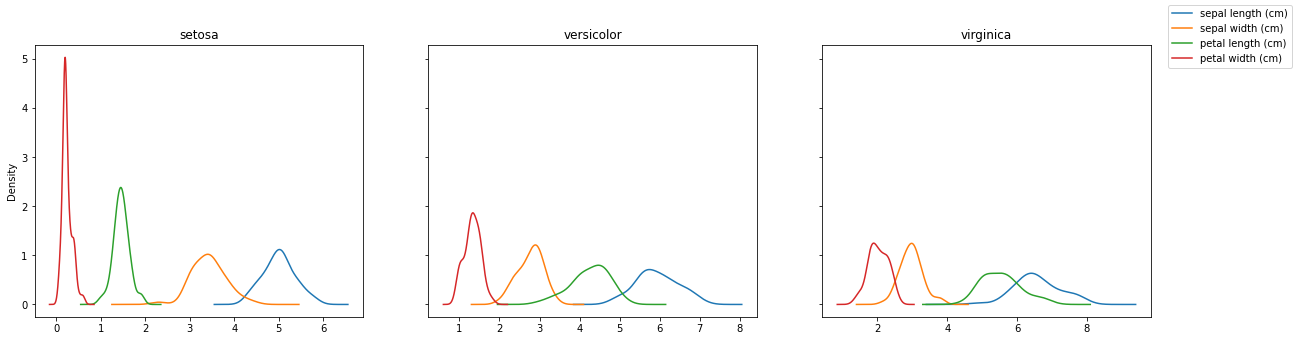

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=3,  sharex=False, sharey=True, figsize=(20, 5))
for ax, (name, grp) in zip(axes, df.groupby('Species')):
    grp.plot(kind='kde', ax=ax, legend=False, title=name)
handles, labels = ax.get_legend_handles_labels()
l = fig.legend(handles, labels)

Is better, but we can do it even better:

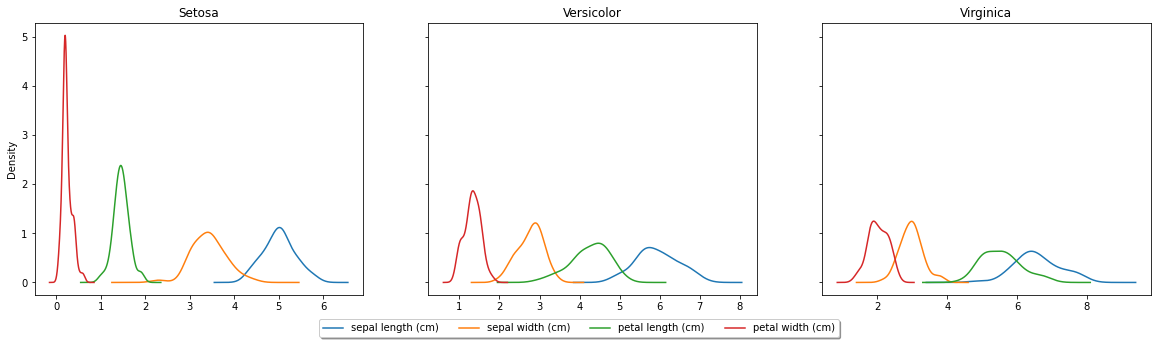

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=3,  sharex=False, sharey=True, figsize=(20, 5))
for ax, (name, grp) in zip(axes, df.groupby('Species')):
    grp.plot(kind='kde', ax=ax, legend=False, title=name.title())
handles, labels = ax.get_legend_handles_labels()
l = fig.legend(handles, labels, loc='lower center', ncol=4, fancybox=True, shadow=True)    

#### Changing the style

If you have been in academia for some time, you might be asking yourself, why doesnt it looks like the R `ggplot` figures? That is easy achievable by adding a single line: `plt.style.use('ggplot')`

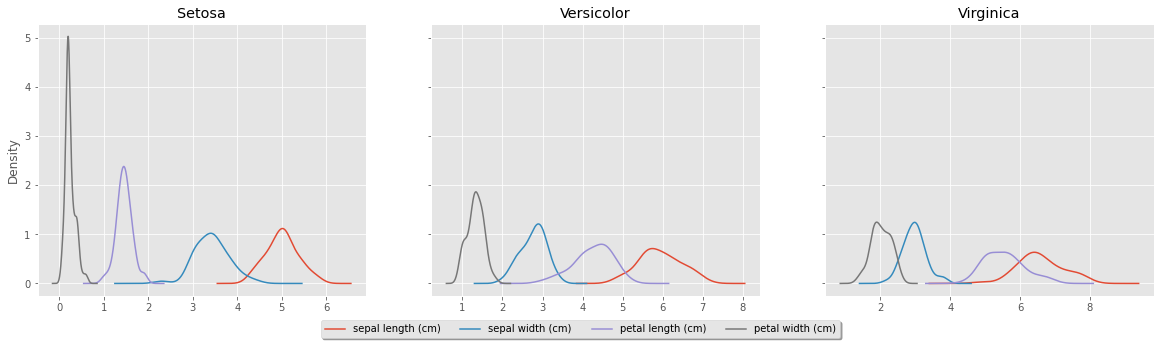

In [16]:
plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=1, ncols=3,  sharex=False, sharey=True, figsize=(20, 5))
for ax, (name, grp) in zip(axes, df.groupby('Species')):
    grp.plot(kind='kde', ax=ax, legend=False, title=name.title())
handles, labels = ax.get_legend_handles_labels()
l = fig.legend(handles, labels, loc='lower center', ncol=4, fancybox=True, shadow=True)    

### Comparing features and groups
So far we have not explore much from our data. Basically we have plot raw values in different ways. But often the more insightful information comes from correlations or regressions. So let's try to generate the regressions between the sepal length and sepal width for each species:

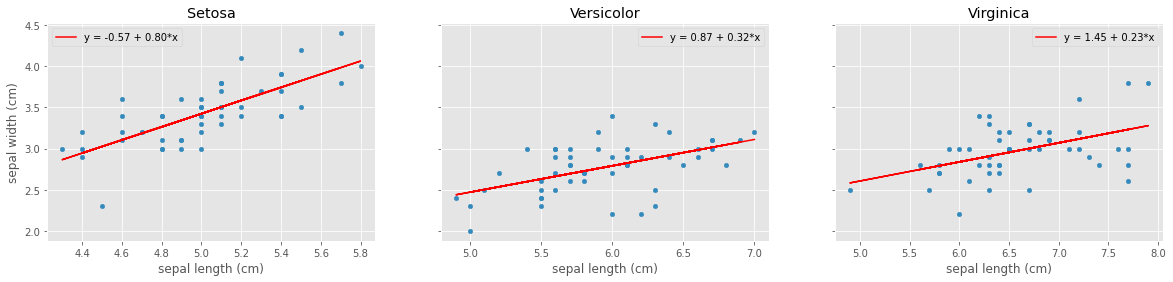

In [17]:
# Load the linear regression function from scikit-learn
from sklearn.linear_model import LinearRegression
# Generate the subplots
fig, axes = plt.subplots(nrows=1, ncols=3,  sharex=False, sharey=True, figsize=(20,4))
# Loop over the groups (species) and the generated axes
for ax, (name, grp) in zip(axes, df.groupby('Species')):
    # Instantiate the regression
    linear_regressor = LinearRegression()
    # Subset the x, and y, and reshape it into an array 
    X, Y = grp['sepal length (cm)'].values.reshape(-1, 1), grp['sepal width (cm)'].values.reshape(-1, 1)
    # Fit the model
    linear_regressor.fit(X, Y)
    # Extract the intercep and slope
    intercept, slope = linear_regressor.intercept_[0], linear_regressor.coef_[0][0]
    # Get the predicted Y
    Y_pred = linear_regressor.predict(X)
    # Plot the raw points
    grp.plot(x='sepal length (cm)', y='sepal width (cm)',  kind='scatter', ax=ax, title=name.title())
    # Add the regression line
    ax.plot(X, Y_pred, color='red', label='y = {:.2f} + {:.2f}*x'.format(intercept, slope))
    # Add the legend
    ax.legend()

#### Saving plots
We are working in a jupyter notebook, and while there is nothing wrong, eventually we would like to save some of the plots to files. `Matplotlib` has the function `savefig` to do that:
```python
savefig(fname, *, dpi='figure', format=None, metadata=None, bbox_inches=None, 
        pad_inches=0.1, facecolor='auto', edgecolor='auto', backend=None, 
        **kwargs)
```

Essentially, after a figure has been constructed, you can do:

```python
plt.savefig('afigure.pdf')
plt.savefig('afigure.png')
plt.savefig('afigure.jpg')
plt.savefig('afigure.svg')
```
for a figure in `pdf`, `png`, `jpg`, and `svg` formats respectively

### Comparing features (an easier way)
Yes! there is an easier way. I mentioned earlier that there are many plotting libraries out there. Most of them are based on `Matplotlib` and has exteneded its functionality. Let's take a look at one of them, `seaborn`. For a regression plot:

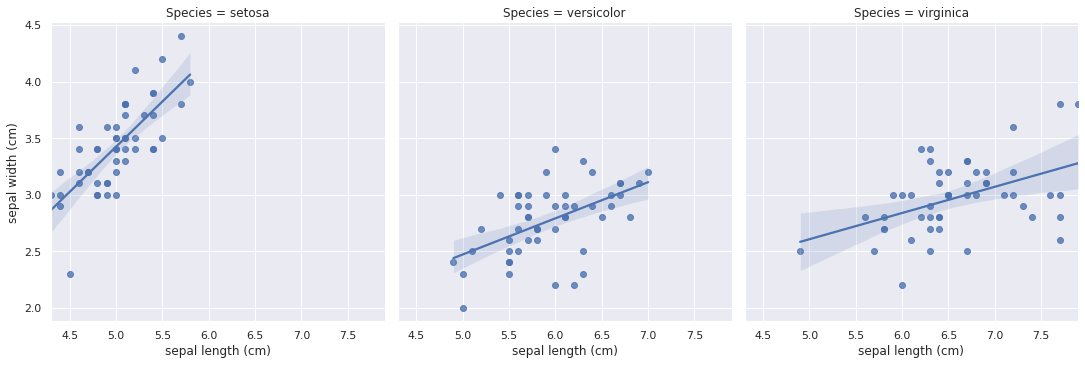

In [18]:
# Load seaborn module
import seaborn as sns
import matplotlib.pyplot as plt
# Set colors as needed
sns.set_theme(color_codes=True)
# Use lmplot to plot a linear model plot
ax = sns.lmplot(x='sepal length (cm)', y='sepal width (cm)', col='Species', data=df)

Or a violin plot:

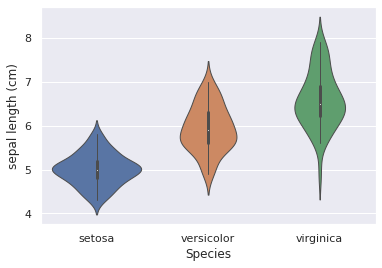

In [19]:
ax = sns.violinplot(data=df, x="Species", y='sepal length (cm)', linewidth=1)

There are many options for seaborn. You can check them at [the seaborn webpage](https://seaborn.pydata.org/)

#### Multiple categorical variables

So far we have only dealth with one categorical variable, species. But there are interesting ways to plot multiple. Let's start by creating an extra category: Collection date. Let's assume that it is important to know which day the collection took place from 3 collection days: 'Monday', 'Wednesday', 'Friday'. then we can add this dummy category like this:

In [20]:
# Import the numerical library numpy
import numpy as np
# Add the collection day randomly
df['Collection_day'] = np.random.choice(['Monday', 'Wednesday', 'Friday'], 150)

Now we can explore ways to show both species and collection date as categories:

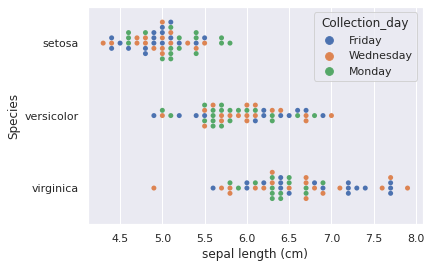

In [21]:
f = sns.swarmplot(data=df, x="sepal length (cm)", y="Species", hue="Collection_day")

### Displaying multiple dimensions: The case of PCA
Another very popular exploratory analysis is the principal component analysis (PCA). It allows you to very simply and fast see the relationships among groups based on multidimensional variables. To start, let's fit the PCA model with our data:

In [22]:
# Import the PCA function from scikit-learn
from sklearn.decomposition import PCA
# Start the instance with 3 components
pca = PCA(n_components=3)
# Fit the model with our numerical variables
pca.fit(df.iloc[:,:4].T)
# Print the variance explained by the model in eacn PC
print(pca.explained_variance_ratio_)
# Extract the individual variance explaiend proportion
v1, v2, v3 = pca.explained_variance_ratio_
# Extract the PC coordinates
PC1, PC2, PC3 = pca.components_

[0.85025771 0.14746289 0.0022794 ]


Good! now we have a model in which the first PC explains 85% of the variance, the second about 15% and the last one less than one. Now, how can we visualize this? There are may options, starting by a scatter plot of the first two components, etc. But we can create a matrix plot with seaborn's `pairplot:

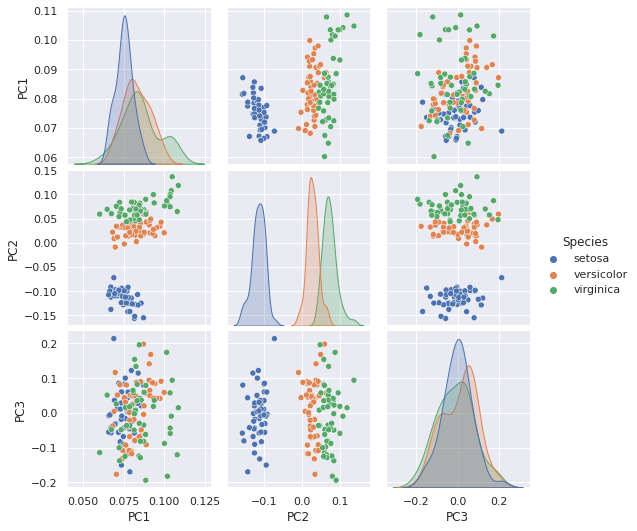

In [23]:
grid = sns.pairplot(pd.DataFrame({'PC1':PC1, 'PC2':PC2, 'PC3':PC3, 'Species':df.Species}), hue='Species')

Great! we can see each individual PC and see how each one contributes to the differences amongs groups. We can also just create a scatter plot in 3 dimensions! let's go back to `matplotlib` and `mpl_toolkit` for that:

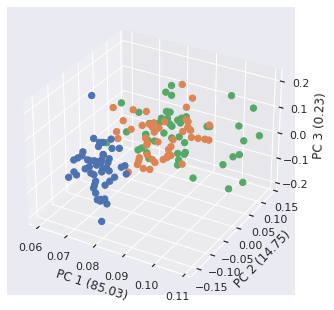

In [24]:
# Import axes 3d
from mpl_toolkits.mplot3d import Axes3D
# Create a figure instance
fig = plt.figure()
# Create the 3D axes
ax2 = Axes3D(fig)
# for coloring, let's get the seaborn palette
cmap = sns.color_palette(as_cmap=True)
# Create a list of colors based on their group
colors = [cmap[x] for x in data.target]
# Plot the scatter with the PC1-3
sc = ax2.scatter(PC1, PC2, PC3, s=40, c=colors, marker='o', alpha=1)
# Set labels
lb = ax2.set_xlabel(f'PC 1 ({v1*100:.2f})')
lb = ax2.set_ylabel(f'PC 2 ({v2*100:.2f})')
lb =ax2.set_zlabel(f'PC 3 ({v3*100:.2f})')

We can also add a custom legend that show the groups:

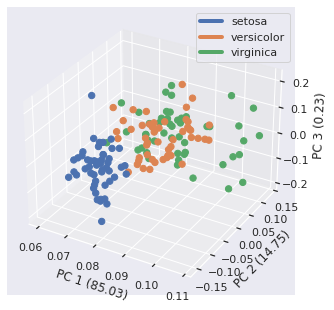

In [25]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
fig = plt.figure()
ax2 = Axes3D(fig)
sc = ax2.scatter(PC1, PC2, PC3, s=40, c=colors, marker='o', alpha=1)
lb = ax2.set_xlabel(f'PC 1 ({v1*100:.2f})')
lb = ax2.set_ylabel(f'PC 2 ({v2*100:.2f})')
lb =ax2.set_zlabel(f'PC 3 ({v3*100:.2f})')
custom_lines = [Line2D([0], [0], color=cmap[x], lw=4) for x in range(3)]
le = ax2.legend(custom_lines, df.Species.unique())

### Added interactivity
Although Matpotlib has some degree of interactivity (not shown here), loads of new tools (plotly, bokeh, etc..) have been developed. Let's create an interactive scatter plot with hover capabilities (will only work on the notebook version of this document) using `bokeh`:

In [33]:
# Import bokeh copmponents
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
# instead of opening a new tab in the browser, render in this notebook
output_notebook()
# Get some colors
cmap = sns.color_palette("deep", as_cmap=True)
colormap = {sp:cmap[x] for (x, sp) in enumerate(df.Species.unique())}
# Add the tool tips to the mouse pointer gives specues and collection day info
TOOLTIPS=[("Species", "@Species"), ("Collection day", "@Collection_day")]
# Create the figure with the tooltips
p = figure(title="Iris Morphology", tooltips=TOOLTIPS)
# Add axis names
p.xaxis.axis_label = 'Petal Length'
p.yaxis.axis_label = 'Petal Width'
# Loop over the grouped dataframe and plot the scatter points per species
for name, flowers in df.groupby('Species', as_index=False):
    p.scatter(x="petal length (cm)", y="petal width (cm)", color=colormap[name], 
              fill_alpha=0.2, size=10, legend_label=name, source=flowers)
# Add legend info
p.legend.location = "top_left"
p.legend.click_policy="hide"
show(p)

Loading BokehJS ...

Play around with it! Hover over points, click the species names, drag the plot, etc...

### Creating apps
There are also many ways to create apps that can be easyly published online. Here I'll show you two options, one with bokeh and the other with streamlit.

#### Bokeh webapp/dashboard
Bokeh allows you not only to generate plots like the previous one, but also allows you to create a simple dashboard that can easyly be deployed in the web. Here I am going to show a very simple interactive one:

In [27]:
%%writefile myapp.py
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from bokeh.io import curdoc
from bokeh.layouts import column, row
from bokeh.models import ColumnDataSource, Div, Select, Slider
from bokeh.plotting import figure
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
names = dict(zip([0,1,2], data.target_names))
df['Species'] = [names[i] for i in data.target]
df['Collection_day'] = np.random.choice(['Monday', 'Wednesday', 'Friday'], 150)
cmap = sns.color_palette(as_cmap=True)
df["color"] = [cmap[x] for x in data.target]
desc_html="""
</style>
<h1>An Interactive Explorer for the Iris Dataset</h1>
<p>Interact with the widgets to restrict data and to show some bokeh functionalities</p>
<p>Inspired by the <a href="https://demo.bokeh.org/movies">Bokeh Movie Explorer</a>.</p>
<br />
"""
desc = Div(text=desc_html, sizing_mode="stretch_width")

# Create Input controls
species = Select(title="Species", value="All", options=['All'] + sorted(df.Species.unique()))
days = Select(title="Collection Day", value="All", options=['All'] + sorted(df.Collection_day.unique()))
sepal_length = Slider(title="Minimum sepal length (cm)", value=4, start=4, end=8, step=0.8)
sepal_width = Slider(title="Minimum sepal width (cm)", value=2, start=2, end=4.5, step=0.4)
petal_length = Slider(title="Minimum petal length (cm)", value=1, start=1, end=7, step=1)
petal_width = Slider(title="Minimum petal width (cm)", value=0, start=0, end=3, step=0.4)
x_axis = Select(title="X Axis", options=sorted(df.select_dtypes([np.number]).columns), 
                value="sepal length (cm)")
y_axis = Select(title="Y Axis", options=sorted(df.select_dtypes([np.number]).columns), 
                value="sepal width (cm)")
source = ColumnDataSource(data=dict(x=[], y=[], color=[], Species=[], Collection_Day=[]))
TOOLTIPS=[("Species", "@Species"), ("Collection_day", "@Collection_day")]
p = figure(height=350, width=700, title="", toolbar_location=None, tooltips=TOOLTIPS, 
           sizing_mode="scale_both")
p.circle(x="x", y="y", source=source, size=7, color="color", line_color=None)

def select():
    sps_val = species.value
    days_val = days.value
    selected = df[
        (df['sepal length (cm)'] >= sepal_length.value) &
        (df['sepal width (cm)'] >= sepal_width.value) &
        (df['petal length (cm)'] >= petal_length.value) &
        (df['petal width (cm)'] >= petal_width.value)
    ]
    if (sps_val != "All"):
        selected = selected[selected.Species.str.contains(sps_val)==True]
    if (days_val != "All"):
        selected = selected[selected["Collection_day"].str.contains(days_val)==True]
    return selected

def update():
    df2 = select()
    x_name = x_axis.value
    y_name = y_axis.value
    p.xaxis.axis_label = x_axis.value
    p.yaxis.axis_label = y_axis.value
    p.title.text = "%d points selected" % len(df2)
    source.data = dict(x=df2[x_name], y=df2[y_name], color=df2["color"], 
                       Species=df2["Species"], Collection_day=df2["Collection_day"])
    
controls = [species, days, sepal_length, sepal_width, petal_length, petal_width, x_axis, y_axis]
for control in controls:
    control.on_change('value', lambda attr, old, new: update())
    
inputs = column(*controls, width=320)

l = column(desc, row(inputs, p), sizing_mode="scale_both")

update()  # initial load of the data

curdoc().add_root(l)
curdoc().title = "Species"

Let's say that we put the above code in a python file called myapp.py. You can see the dashboard in your browser by typing `bokeh serve --show myapp.py` in the terminal (that command assumes you are in the same folder, otherwise navigate to it). The `--show` forces bokeh to open the dashboard with the command, otherwise it will be available in port 5006 by default (this can be changed, check `bokeh serve --help` for more options).

Now let's disect a bit the code we just wrote:

```python
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from bokeh.io import curdoc
from bokeh.layouts import column, row
from bokeh.models import ColumnDataSource, Div, Select, Slider
from bokeh.plotting import figure
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
names = dict(zip([0,1,2], data.target_names))
df['Species'] = [names[i] for i in data.target]
df['Collection_day'] = np.random.choice(['Monday', 'Wednesday', 'Friday'], 150)
cmap = sns.color_palette(as_cmap=True)
df["color"] = [cmap[x] for x in data.target]
desc_html="""
</style>
<h1>An Interactive Explorer for the Iris Dataset</h1>
<p>Interact with the widgets to restrict data and to show some bokeh functionalities</p>
<p>Inspired by the <a href="https://demo.bokeh.org/movies">Bokeh Movie Explorer</a>.</p>
<br />
"""
desc = Div(text=desc_html, sizing_mode="stretch_width")
```

This part imports the necesary libraries and loads the data into a pandas dataframe, adding species, collection day, and color. It also includes a bit of a description in HTML.

```python
species = Select(title="Species", value="All", options=['All'] + sorted(df.Species.unique()))
days = Select(title="Collection Day", value="All", options=['All'] + sorted(df.Collection_day.unique()))
sepal_length = Slider(title="Minimum sepal length (cm)", value=4, start=4, end=8, step=0.8)
sepal_width = Slider(title="Minimum sepal width (cm)", value=2, start=2, end=4.5, step=0.4)
petal_length = Slider(title="Minimum petal length (cm)", value=1, start=1, end=7, step=1)
petal_width = Slider(title="Minimum petal width (cm)", value=0, start=0, end=3, step=0.4)
x_axis = Select(title="X Axis", options=sorted(df.select_dtypes([np.number]).columns), 
                value="sepal length (cm)")
y_axis = Select(title="Y Axis", options=sorted(df.select_dtypes([np.number]).columns), 
                value="sepal width (cm)")
source = ColumnDataSource(data=dict(x=[], y=[], color=[], Species=[], Collection_Day=[]))
TOOLTIPS=[("Species", "@Species"), ("Collection_day", "@Collection_day")]
```
This part create the input controls that add the interactivity. `Select` creates dropdown to select the species, colection day, and the axes of the plot (we could plot more things but for simplicity). `Slider` creates a widget that allows you to slide a ruler to pick your value. Here we also generate a source instance that `bokeh` understands. In our case is in column format and we instantiated with empty columns. Note that color, species, and collection day match our data frame, but x, and y do not. This is because x and y are going to change depending on the user's selection. Lastly, we use TOOLTIPS, which populate the pop-up message when you hover the mouse over the points.

```python
p = figure(height=350, width=700, title="", toolbar_location=None, tooltips=TOOLTIPS, 
           sizing_mode="scale_both")
p.circle(x="x", y="y", source=source, size=7, color="color", line_color=None)
```

This part displays the default plot with the default values for the filters.

```python
def select():
    sps_val = species.value
    days_val = days.value
    selected = df[
        (df['sepal length (cm)'] >= sepal_length.value) &
        (df['sepal width (cm)'] >= sepal_width.value) &
        (df['petal length (cm)'] >= petal_length.value) &
        (df['petal width (cm)'] >= petal_width.value)
    ]
    if (sps_val != "All"):
        selected = selected[selected.Species.str.contains(sps_val)==True]
    if (days_val != "All"):
        selected = selected[selected["Collection_day"].str.contains(days_val)==True]
    return selected
```

This python fuctions follows its namesake, it selects from the widgets each of the variables and return the subset dataframe.

```python
def update():
    df2 = select()
    x_name = x_axis.value
    y_name = y_axis.value
    p.xaxis.axis_label = x_axis.value
    p.yaxis.axis_label = y_axis.value
    p.title.text = "%d points selected" % len(df2)
    source.data = dict(x=df2[x_name], y=df2[y_name], color=df2["color"], 
                       Species=df2["Species"], Collection_day=df2["Collection_day"])
```
This function also follows its name, updating the source data that will be plotted after the selection donw by the `select` function.

```python
controls = [species, days, sepal_length, sepal_width, petal_length, petal_width, x_axis, y_axis]
for control in controls:
    control.on_change('value', lambda attr, old, new: update())
```
This part of the code sets all the controls and set the updates when they happen.

```python
inputs = column(*controls, width=320)

l = column(desc, row(inputs, p), sizing_mode="scale_both")

update()  # initial load of the data

curdoc().add_root(l)
curdoc().title = "Species"
```
This last part of the code organizes your dashboard in columns and rows, calls update for the first time and add everything to the front end.

### Now let's try STREAMLIT
Just another clean webapp development. It works in a very similar manner as `bokeh` but the interactions with the data feel more stream lined:

In [ ]:
%%writefile streamlit_app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
mpl.use("agg")
plt.style.use('ggplot')

# Page configuration
apptitle = 'Iris Dataexplorer'
st.set_page_config(page_title=apptitle, page_icon=":eyeglasses:")

# Title of the app
st.title('An Interactive Explorer for the Iris Dataset')

# Description and information.
st.markdown("""
* Interact with the widgets to restrict data and to show some streamlit functionalities
* Inspired by [Streamlit's Gravitational Wave Quickview]("https://share.streamlit.io/jkanner/streamlit-dataview/master/app.py/+/")
""")

# Load data
data_load_state = st.text('Loading data...')
dat = load_iris()
data = pd.DataFrame(dat.data, columns=dat.feature_names)
names = dict(zip([0,1,2], dat.target_names))
data['Species'] = [names[i] for i in dat.target]
data['Collection_day'] = np.random.choice(['Monday', 'Wednesday', 'Friday'], 150)
cmap = sns.color_palette(as_cmap=True)
data["color"] = [cmap[x] for x in dat.target]
data_load_state.text("Data loading done!")

# Sidebar
st.sidebar.markdown("## Select Species and Feature to Explore")
sps_value = st.sidebar.selectbox('Species', ['All'] + sorted(data.Species.unique()))
days_value= st.sidebar.selectbox('Collection day', ['All'] + sorted(data.Collection_day.unique()))
x_value = st.sidebar.selectbox('X Axis', data.select_dtypes([np.number]).columns)
y_value = st.sidebar.selectbox('Y Axis', data.select_dtypes([np.number]).columns, index=1)                                 
st.sidebar.markdown('## Set Plot Parameters')
X = st.sidebar.slider(x_value, min(data[x_value]), max(data[x_value]), float(np.std(data[x_value]))) 
Y = st.sidebar.slider(y_value, min(data[y_value]), max(data[y_value]), float(np.std(data[y_value])))

if sps_value != 'All':
    data = data[data.Species == sps_value]

if days_value != 'All':
    data = data[data.Collection_day == days_value]
# Generate the plot
fig, ax = plt.subplots()
plot = data.reindex(columns=[x_value, y_value, 'color']).query(
    f'`{x_value}` > @X & `{y_value}` > @Y'
).plot.scatter(x=x_value, y=y_value, c='color', ax=ax) 
custom_lines = [Line2D([0], [0], color=cmap[x], lw=4) for x in range(3)]
ax.legend(custom_lines, data.Species.unique())
st.pyplot(fig, clear_figure=True)

with st.expander("See notes"):
    st.markdown("""
This is a space that is collapsed in the app.""")


st.subheader("Second header")
st.markdown("""
This is an example about subheaders in streamlit""")

Let's assume that you called this app `streamlit_app.py`, you can deploy it using `streamlit run streamlit_app.py`, and will be directed through port 8501 and show it in your browser. Seeing the comments seems self explanatory, but here the code block explanation:

```python
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
mpl.use("agg")
plt.style.use('ggplot')
```
This block loads all the necesary modules and set some of the settings (ggplot for style and agg as the backend for the plots)

```python
# Page configuration
apptitle = 'Iris Dataexplorer'
st.set_page_config(page_title=apptitle, page_icon=":eyeglasses:")

# Title of the app
st.title('An Interactive Explorer for the Iris Dataset')

# Description and information.
st.markdown("""
* Interact with the widgets to restrict data and to show some streamlit functionalities
* Inspired by [Streamlit's Gravitational Wave Quickview]("https://share.streamlit.io/jkanner/streamlit-dataview/master/app.py/+/")
""")
```
This block does all the page configuration, description, etc. As you can see here, the description can be done in markdown instead of html.

```python
# Load data
data_load_state = st.text('Loading data...')
dat = load_iris()
data = pd.DataFrame(dat.data, columns=dat.feature_names)
names = dict(zip([0,1,2], dat.target_names))
data['Species'] = [names[i] for i in dat.target]
data['Collection_day'] = np.random.choice(['Monday', 'Wednesday', 'Friday'], 150)
cmap = sns.color_palette(as_cmap=True)
data["color"] = [cmap[x] for x in dat.target]
data_load_state.text("Data loading done!")
```

this snippet loads the data, and does any data manipulation needed. Also, it provides information on the state of data loading (in case it takes some time).

```python
# Sidebar
st.sidebar.markdown("## Select Species and Feature to Explore")
sps_value = st.sidebar.selectbox('Species', ['All'] + sorted(data.Species.unique()))
days_value= st.sidebar.selectbox('Collection day', ['All'] + sorted(data.Collection_day.unique()))
x_value = st.sidebar.selectbox('X Axis', data.select_dtypes([np.number]).columns)
y_value = st.sidebar.selectbox('Y Axis', data.select_dtypes([np.number]).columns, index=1)                                 
st.sidebar.markdown('## Set Plot Parameters')
X = st.sidebar.slider(x_value, min(data[x_value]), max(data[x_value]), float(np.std(data[x_value]))) 
Y = st.sidebar.slider(y_value, min(data[y_value]), max(data[y_value]), float(np.std(data[y_value])))
```
This part sets the sidebar, where all the controls are with `selectbox` and sliders. You can also use a slider, the same way that we did in `bokeh`.

```python
if sps_value != 'All':
    data = data[data.Species == sps_value]

if days_value != 'All':
    data = data[data.Collection_day == days_value]
```
this piece of code handles the cases in which we have an option that is not in the dataframe (`All` in our case). Then we can plot with:

```python
# Generate the plot
fig, ax = plt.subplots()
plot = data.reindex(columns=[x_value, y_value, 'color']).query(
    f'`{x_value}` > @X & `{y_value}` > @Y'
).plot.scatter(x=x_value, y=y_value, c='color', ax=ax) 
custom_lines = [Line2D([0], [0], color=cmap[x], lw=4) for x in range(3)]
ax.legend(custom_lines, data.Species.unique())
st.pyplot(fig, clear_figure=True)
```

Finally, we can add epilogs, and expanding messages and notes:

```python
with st.expander("See notes"):
    st.markdown("""
This is a space that is collapsed in the app.""")


st.subheader("Second header")
st.markdown("""
This is an example about subheaders in streamlit""")
```


That is all for now!! remember that this is a very quick and dirty walk through data visualization.